# SciKit Learn linear and polynomial regression

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Read data

In [2]:
dataset = pd.concat([
    pd.read_csv('../dataset/smog_part1.csv', index_col = 0),
    pd.read_csv('../dataset/smog_part2.csv', index_col = 0)
])


In [3]:
dataset = dataset[['pm25_x', 'pm25_y', 'temperatureSht', 'humiditySht', 'pressure']]
dataset = dataset[dataset['humiditySht'] >= 60]

dataset.head()

,pm25_x,pm25_y,temperatureSht,humiditySht,pressure
0,19.0,13.8,6.1,72,986
1,16.7,14.4,5.9,74,986
2,21.8,15.1,5.7,75,986
3,21.8,18.0,5.7,76,986
4,25.0,19.0,5.5,77,986


# Train and test split

Split data for train and test sets and normalze

In [4]:
Y = dataset['pm25_x'].to_numpy().reshape(-1, 1)
X = dataset.drop('pm25_x', axis = 1).to_numpy()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 0)

In [6]:
scaler = preprocessing.StandardScaler().fit(x_train)
y_scaler = max(y_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

y_train = y_train / y_scaler

# SKLearn linear regression

In [7]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = regr.predict(x_test) * y_scaler

r2 = r2_score(y_test, y_pred) * 100
print('R^2: ', r2)
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

R^2:  72.72872140802924
Mean squared error:  16.11200942994972
Mean absolute error:  2.340245376355228


In [9]:
regr.coef_

array([[ 0.06568269,  0.00494061, -0.00580339, -0.00382393]])

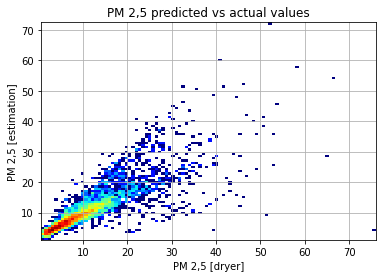

In [10]:
plt.hist2d(y_test[:, 0], y_pred[:, 0], bins= 100, cmap = 'jet', norm = matplotlib.colors.LogNorm())
plt.xlabel('PM 2,5 [dryer]')
plt.ylabel('PM 2,5 [estimation]')
plt.title('PM 2,5 predicted vs actual values')
plt.grid(True)
plt.show()

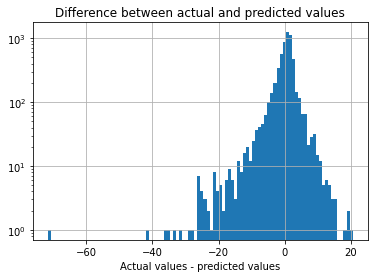

In [11]:
plt.hist(y_pred - y_test, density = False, bins = 100)

plt.yscale('log')
plt.xlabel('Actual values - predicted values')
plt.title('Difference between actual and predicted values')
plt.grid(True)
plt.show()

# SKLearn polynomial

In [12]:
def polynomial_regressor(degree, x_train, y_train):
    poly_model = PolynomialFeatures(degree = degree)

    # transform out polynomial features
    poly_x_values = poly_model.fit_transform(x_train)

    # should be in the form [1, a, b, a^2, ab, b^2]
    print(f'Initial values {x_train[0]}\nMapped to {poly_x_values[0]}')

    # fit the model
    poly_model.fit(poly_x_values, y_train)

    # linear regression as a base
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_train)

    print('Coefficients: ', regression_model.coef_)
    return regression_model, poly_model

### Second-degree polynomial

In [13]:
second_degree_model, poly_model = polynomial_regressor(2, x_train, y_train)

y_pred = second_degree_model.predict(poly_model.fit_transform(x_test)) * y_scaler

Initial values [-0.89774329  0.16683804 -0.42975215 -0.06721541]
Mapped to [ 1.         -0.89774329  0.16683804 -0.42975215 -0.06721541  0.80594302
 -0.14977773  0.38580711  0.06034219  0.02783493 -0.07169901 -0.01121409
  0.18468691  0.02888597  0.00451791]
Coefficients:  [[ 0.          0.08152226  0.00434122 -0.01121247 -0.00032203 -0.00102372
   0.00983528 -0.01042324  0.00209406 -0.00241915 -0.00247415 -0.00048981
  -0.004523   -0.00261866 -0.00294735]]


In [14]:
print('R^2: ', r2_score(y_test, y_pred) * 100)
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

R^2:  78.3929917262411
Mean squared error:  12.765529855365951
Mean absolute error:  1.8890636808318022


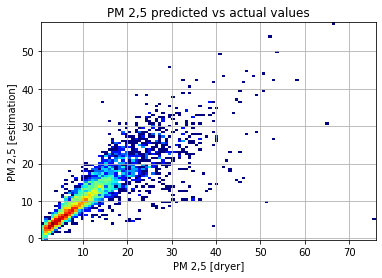

In [15]:
plt.hist2d(y_test[:, 0], y_pred[:, 0], bins= 100, cmap = 'jet', norm = matplotlib.colors.LogNorm())
plt.xlabel('PM 2,5 [dryer]')
plt.ylabel('PM 2,5 [estimation]')
plt.title('PM 2,5 predicted vs actual values')
plt.grid(True)
plt.show()

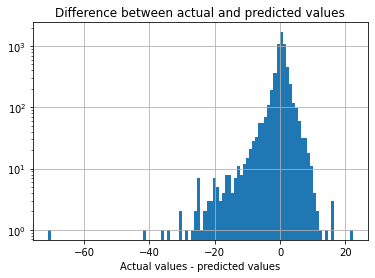

In [16]:
plt.hist(y_pred - y_test, density = False, bins = 100)

plt.yscale('log')
plt.xlabel('Actual values - predicted values')
plt.title('Difference between actual and predicted values')
plt.grid(True)
plt.show()

### third-degree polynomial

In [17]:
third_degree_model, poly_model = polynomial_regressor(3, x_train, y_train)

y_pred = third_degree_model.predict(poly_model.fit_transform(x_test)) * y_scaler

Initial values [-0.89774329  0.16683804 -0.42975215 -0.06721541]
Mapped to [ 1.00000000e+00 -8.97743293e-01  1.66838038e-01 -4.29752151e-01
 -6.72154124e-02  8.05943020e-01 -1.49777730e-01  3.85807111e-01
  6.03421857e-02  2.78349311e-02 -7.16990058e-02 -1.12140876e-02
  1.84686911e-01  2.88859680e-02  4.51791166e-03 -7.23529941e-01
  1.34461953e-01 -3.46355746e-01 -5.41717925e-02 -2.49886227e-02
  6.43673016e-02  1.00673719e-02 -1.65801436e-01 -2.59321841e-02
 -4.05592490e-03  4.64392530e-03 -1.19621215e-02 -1.87093637e-03
  3.08128019e-02  4.81927825e-03  7.53759520e-04 -7.93695972e-02
 -1.24138069e-02 -1.94158225e-03 -3.03673296e-04]
Coefficients:  [[-1.18233889e-17  8.77457654e-02  1.83582118e-03 -7.91585122e-03
  -5.86789283e-04 -4.17039563e-03  8.96831983e-03 -8.85519321e-03
  -1.26620944e-03 -2.39778105e-03 -4.53461957e-04 -7.26613636e-04
  -5.94182129e-03 -8.50447383e-04 -2.47081089e-03  2.01941592e-04
   7.01709761e-04  6.87566811e-04  9.56775866e-04 -1.67409517e-04
   3.30845

In [18]:
print('R^2: ', r2_score(y_test, y_pred) * 100)
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

R^2:  79.38273678269547
Mean squared error:  12.180783466264346
Mean absolute error:  1.8080937936790453


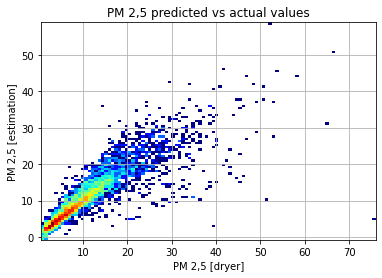

In [19]:
plt.hist2d(y_test[:, 0], y_pred[:, 0], bins= 100, cmap = 'jet', norm = matplotlib.colors.LogNorm())
plt.xlabel('PM 2,5 [dryer]')
plt.ylabel('PM 2,5 [estimation]')
plt.title('PM 2,5 predicted vs actual values')
plt.grid(True)
plt.show()

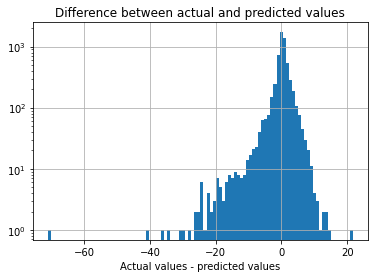

In [20]:
plt.hist(y_pred - y_test, density = False, bins = 100)

plt.yscale('log')
plt.xlabel('Actual values - predicted values')
plt.title('Difference between actual and predicted values')
plt.grid(True)
plt.show()